# Reading Dataset

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/Rajinder/winequality-red.csv',sep=';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory Data Analysis

In [4]:
data.shape

(1599, 12)

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

In [8]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Outlier Detection 

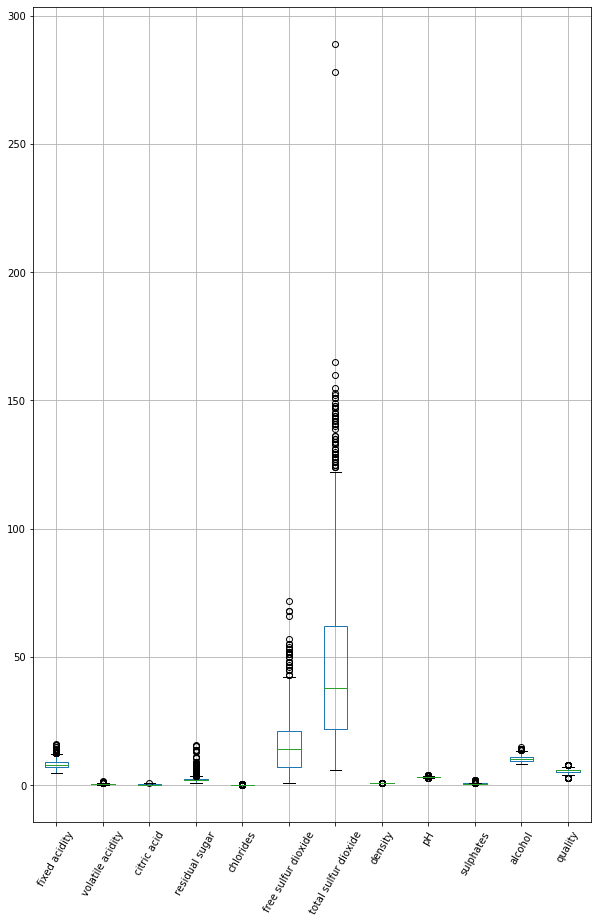

In [11]:
data.boxplot(rot=60, grid='True', fontsize=10, figsize=(10,15))

From the above boxplot, as we can see outliers for some attributes are clearly visible but for those like ph, volatile acidity, etc. which we can not see we will use individual plotting.  

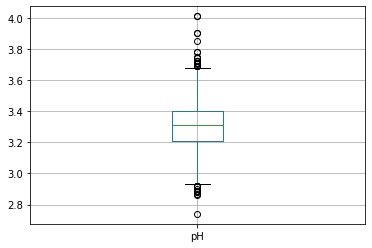

In [12]:
data.boxplot(column='pH')

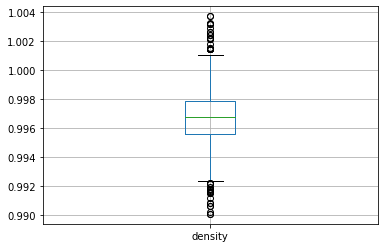

In [13]:
data.boxplot(column='density')

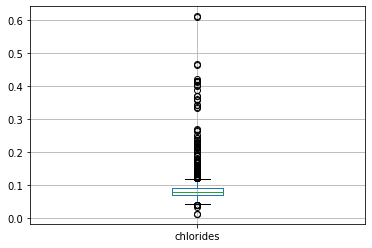

In [14]:
data.boxplot(column='chlorides')

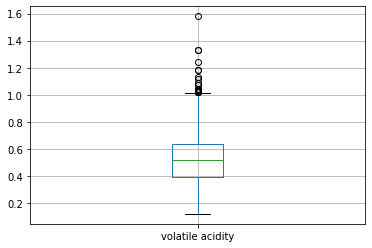

In [15]:
data.boxplot(column='volatile acidity')

## Removing Outliers 

In [16]:
def remove_outlier(data_in, col_name):
    q1 = data_in[col_name].quantile(0.25)
    q3 = data_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    data_out = data_in.loc[(data_in[col_name] > fence_low) & (data_in[col_name] < fence_high)]
    return data_out

In [17]:
data = remove_outlier(data,'sulphates')
data = remove_outlier(data,'total sulfur dioxide')
data = remove_outlier(data,'free sulfur dioxide')
data = remove_outlier(data,'fixed acidity')
data = remove_outlier(data,'residual sugar')

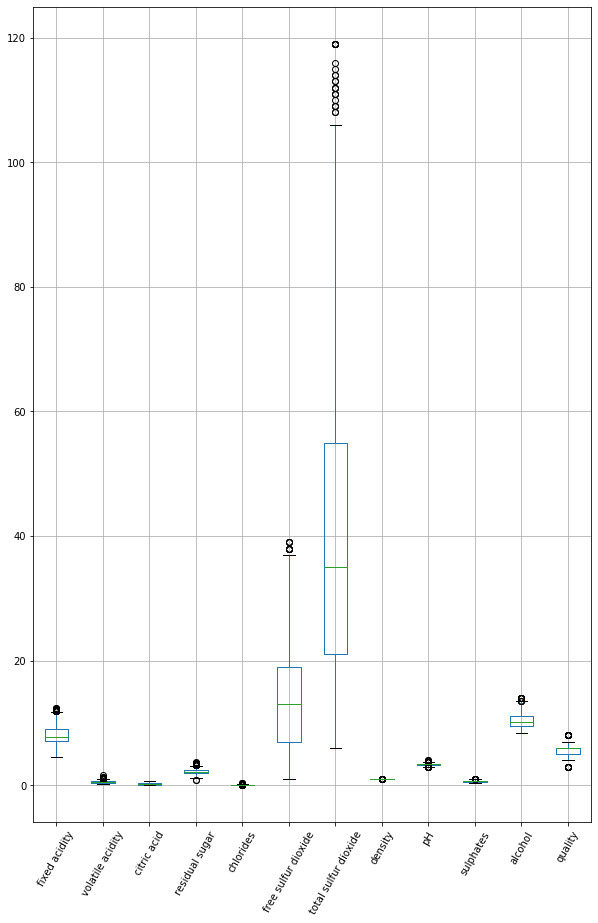

In [18]:
data.boxplot(rot=60, grid='True', fontsize=10, figsize=(10,15))

In [19]:
data = remove_outlier(data,'total sulfur dioxide')
data = remove_outlier(data,'pH')
data = remove_outlier(data,'density')
data = remove_outlier(data,'chlorides')
data = remove_outlier(data,'volatile acidity')

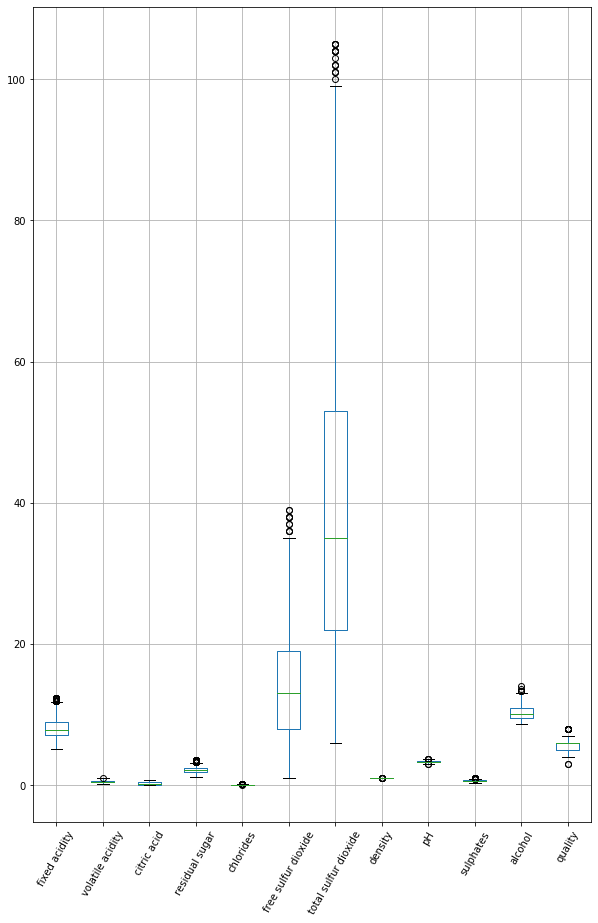

In [20]:
data.boxplot(rot=60, grid='True', fontsize=10, figsize=(10,15))

# Correlation Matrix

In [21]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.277277,0.662601,0.229095,0.165437,-0.158375,-0.098392,0.599424,-0.701506,0.170219,-0.019080,0.130272
volatile acidity,-0.277277,1.000000,-0.640987,0.019413,0.108797,-0.006629,0.094114,0.042439,0.237229,-0.329782,-0.227969,-0.351612
citric acid,0.662601,-0.640987,1.000000,0.150927,0.051726,-0.087836,-0.019694,0.290471,-0.489446,0.270902,0.166153,0.243933
residual sugar,0.229095,0.019413,0.150927,1.000000,0.234265,0.082237,0.155480,0.383058,-0.042485,0.056553,0.130334,0.042636
chlorides,0.165437,0.108797,0.051726,0.234265,1.000000,0.007036,0.166967,0.403339,-0.134292,-0.085659,-0.296384,-0.186983
free sulfur dioxide,-0.158375,-0.006629,-0.087836,0.082237,0.007036,1.000000,0.643531,-0.028053,0.169079,0.101253,-0.003203,0.007153
total sulfur dioxide,-0.098392,0.094114,-0.019694,0.155480,0.166967,0.643531,1.000000,0.150617,0.069925,-0.050960,-0.228379,-0.167694
density,0.599424,0.042439,0.290471,0.383058,0.403339,-0.028053,0.150617,1.000000,-0.222146,0.075106,-0.538775,-0.209104
pH,-0.701506,0.237229,-0.489446,-0.042485,-0.134292,0.169079,0.069925,-0.222146,1.000000,-0.009653,0.092249,-0.093965
sulphates,0.170219,-0.329782,0.270902,0.056553,-0.085659,0.101253,-0.050960,0.075106,-0.009653,1.000000,0.274298,0.433661


We will use heatmap for better visual understanding of the correlation matrix.

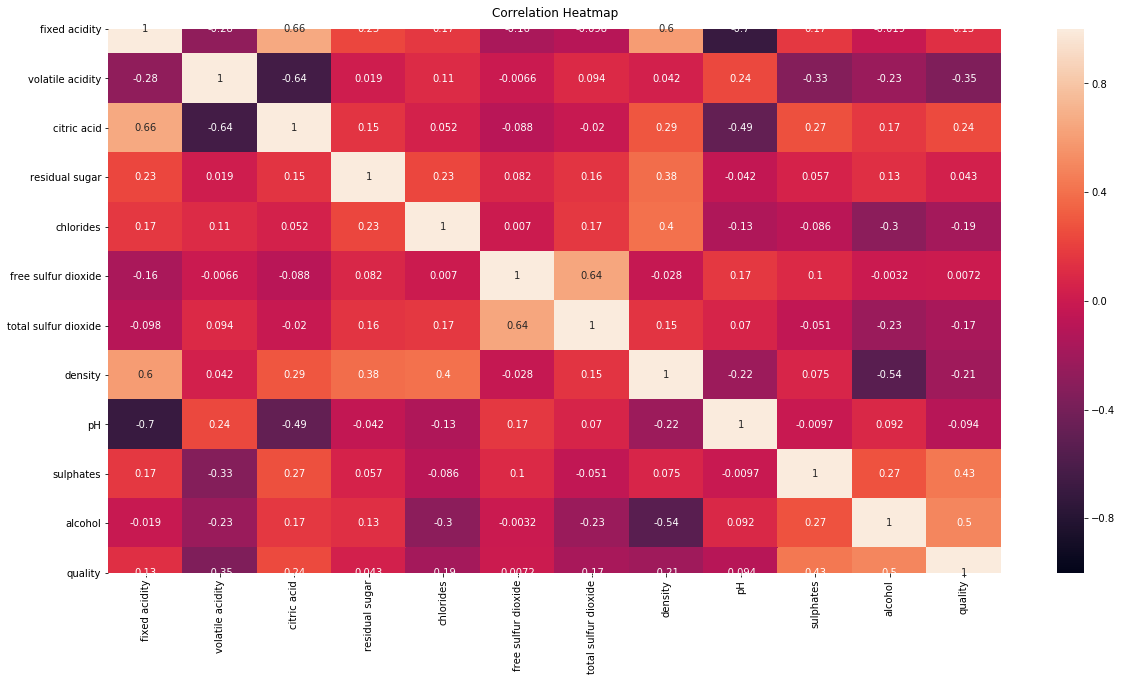

In [22]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.figure(figsize=(20, 10))
heatmap = sb.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

As it is clear that there is a strongly inverse correlation between pH and fixed acidity, so now we will remove this attribute.

In [44]:
cor_matrix = data.corr().abs()

In [24]:
import numpy as np

upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                   NaN          0.277277     0.662601   
volatile acidity                NaN               NaN     0.640987   
citric acid                     NaN               NaN          NaN   
residual sugar                  NaN               NaN          NaN   
chlorides                       NaN               NaN          NaN   
free sulfur dioxide             NaN               NaN          NaN   
total sulfur dioxide            NaN               NaN          NaN   
density                         NaN               NaN          NaN   
pH                              NaN               NaN          NaN   
sulphates                       NaN               NaN          NaN   
alcohol                         NaN               NaN          NaN   
quality                         NaN               NaN          NaN   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [25]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(); print(to_drop)


['pH']


In [26]:
df = data.drop(data[to_drop], axis=1)
print(); print(df.head())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density  sulphates  alcohol  \
0                 11.0                  34.0   0.9978       0.56      9.4   
1                 25.0                  67.0   0.9968       0.68      9.8   
2                 15.0                  54.0   0.9970       0.65      9.8   
3                 17.0                  60.0   0.9980       0.58      9.8   
4                 11.0                  34.0   0.9978       0.56      9.4   

   quality  
0        5  
1        5  
2        5  
3        6  
4 

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,0.56,9.4,5


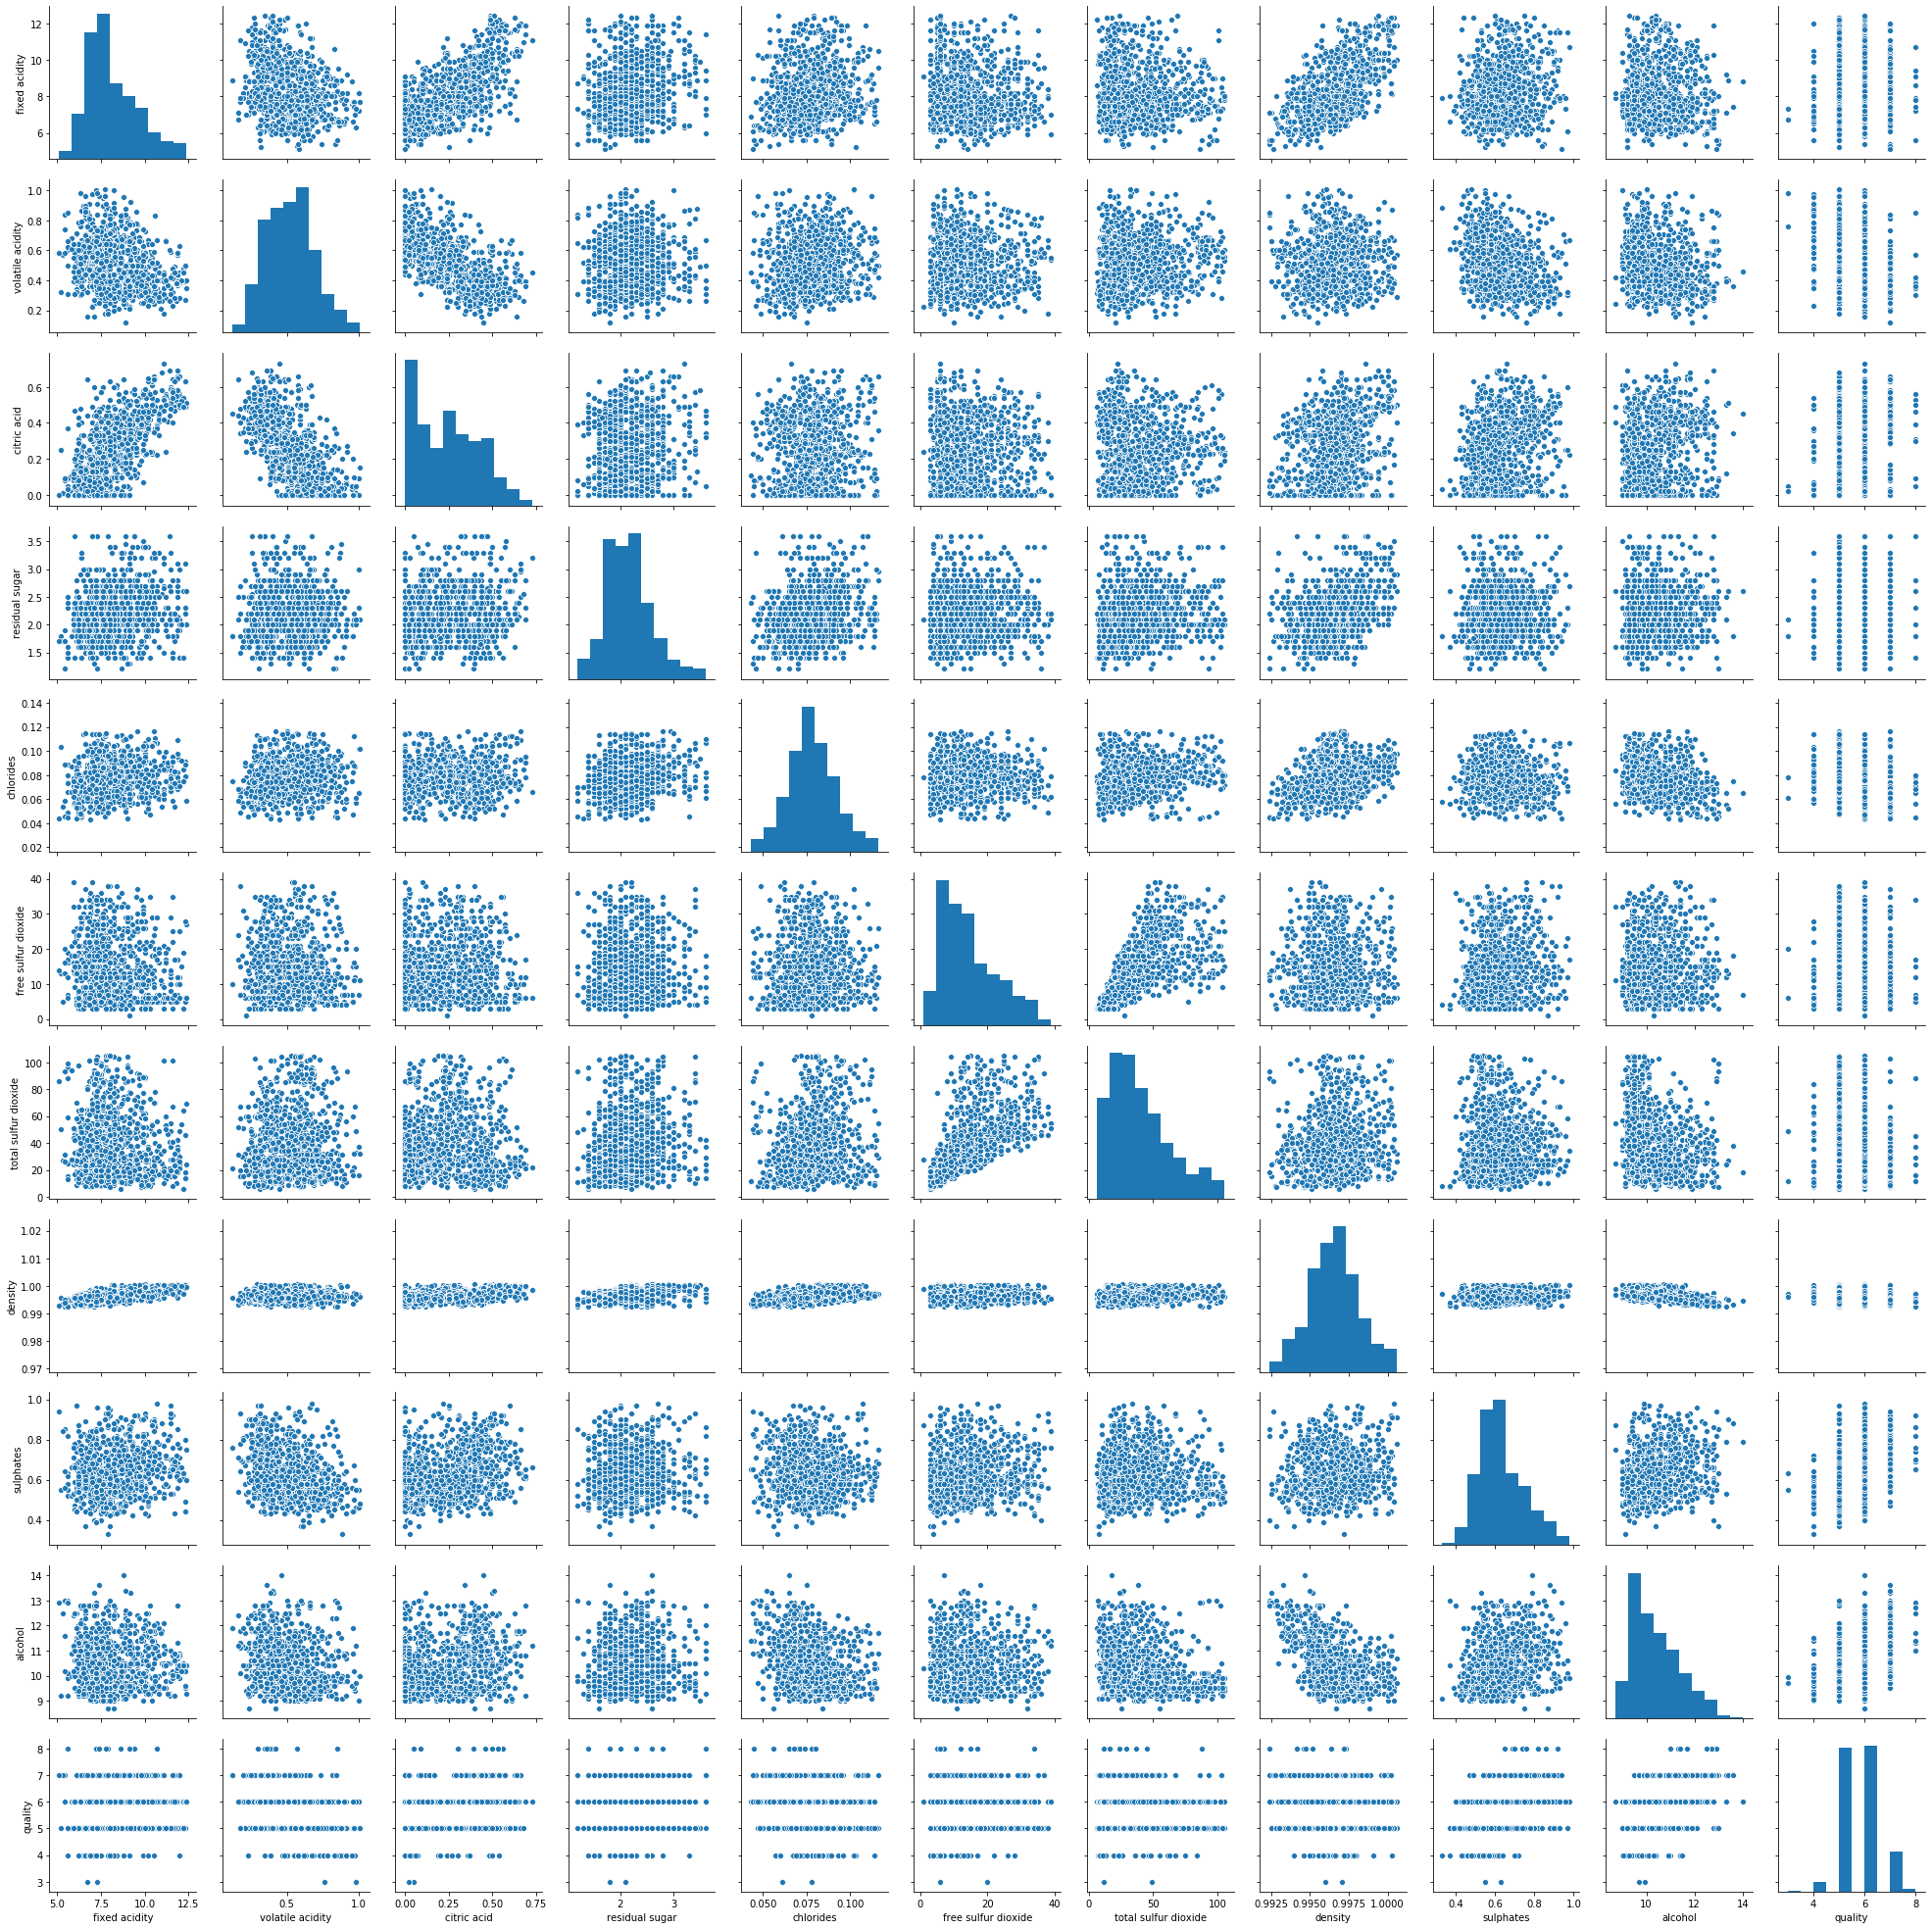

In [28]:
sb.pairplot(df)

# Splitting the dataset into train and test 

In [29]:
y = df.quality

In [30]:
x = df

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [32]:
print("shape of original dataset :", df.shape)
print("shape of input-training set", x_train.shape)
print("shape of output-training set", y_train.shape)
print("shape of input-testing set", x_test.shape)
print("shape of output-testing set", y_test.shape)

shape of original dataset : (1132, 11)
shape of input-training set (905, 11)
shape of output-training set (905,)
shape of input-testing set (227, 11)
shape of output-testing set (227,)


# Training the dataset

Here we tried a few multi class classification algorithms to train our model and then we will proceed with the model having higest accuracy.

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
LR.predict(x_test)
round(LR.score(x_test,y_test), 4)

C:\Users\Rajinder\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.8194

In [39]:
print(LR.predict(x_test))

[6 5 6 5 5 5 5 6 5 6 5 5 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 5 6 5 6 5 5 6 6 6
 6 6 5 5 5 5 5 6 6 6 5 5 5 5 6 7 5 5 6 5 5 5 6 5 5 6 6 6 6 5 6 5 6 5 6 7 6
 6 5 5 5 7 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 5 5 5 6 6 5 5 6 5 7 7
 5 5 5 6 7 5 6 5 6 5 5 6 6 7 5 6 5 6 5 5 5 6 5 5 6 6 6 6 6 6 5 6 5 6 5 6 5
 6 5 6 5 7 5 6 6 6 5 5 6 6 5 5 6 6 5 6 5 5 6 5 6 6 5 6 5 5 5 5 6 6 7 5 5 5
 5 6 6 6 5 5 6 6 7 6 7 6 6 6 6 5 5 6 6 5 6 6 6 7 5 5 7 5 6 7 6 7 5 7 6 5 5
 6 5 5 7 6]


## Support Vector Machines

In [34]:
from sklearn import svm

SVM = svm.SVC(decision_function_shape="ovo").fit(x_train, y_train)
SVM.predict(x_test)
round(SVM.score(x_test, y_test), 4)

C:\Users\Rajinder\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7797

In [38]:
print(SVM.predict(x_test))

[5 5 6 6 6 5 5 5 5 5 5 6 5 6 5 5 6 6 5 5 6 6 6 4 6 6 6 6 5 5 5 6 5 5 7 7 6
 6 6 6 5 5 5 5 6 6 6 5 5 5 5 6 6 6 6 6 5 5 6 6 5 5 6 6 6 6 5 6 6 5 5 5 6 6
 5 5 5 5 6 6 5 7 7 5 5 6 6 5 5 5 5 5 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 6 5 6 6
 5 5 6 7 7 5 7 5 6 5 5 6 6 6 5 6 5 6 6 5 6 7 5 5 6 6 6 6 6 6 6 6 5 6 5 5 6
 7 5 5 5 7 6 6 6 6 5 6 7 6 6 5 5 6 5 5 5 5 7 5 6 6 5 5 5 5 5 5 6 6 6 5 5 5
 5 6 6 6 5 5 6 5 6 5 6 6 6 6 5 5 6 6 6 5 7 7 6 6 5 5 6 5 6 6 5 6 5 6 6 5 5
 6 6 5 6 6]


## Neural Network 

In [36]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
NN.predict(x_test)
round(NN.score(x_test, y_test), 4)

0.9163

In [37]:
print(NN.predict(x_test))

[5 5 6 5 6 5 5 6 5 5 5 6 5 6 5 5 6 6 5 6 7 6 5 5 6 6 6 5 5 6 6 6 5 5 7 7 6
 6 6 6 5 5 5 5 7 6 6 5 5 5 5 6 6 5 5 6 5 5 5 6 5 5 6 6 6 6 5 6 5 6 5 6 6 6
 6 5 5 5 6 6 5 7 7 6 5 5 5 5 5 5 5 4 5 6 6 6 6 6 6 6 5 5 5 6 6 5 5 6 5 7 6
 5 5 5 7 7 5 7 5 6 5 5 7 6 7 5 6 5 6 5 5 5 7 5 5 6 6 6 6 6 6 5 6 5 6 5 6 5
 7 5 6 5 7 5 6 6 6 5 5 7 6 6 5 6 6 5 5 5 5 6 5 6 6 5 6 5 5 5 5 5 6 7 5 5 5
 5 7 6 6 5 5 7 5 6 6 6 6 6 6 5 5 6 6 6 5 6 6 6 7 5 5 6 5 7 6 5 6 5 6 6 4 5
 6 5 5 6 6]


### After training our dataset with the above models, Neural Network model gives us the highest accuracy. Going further with the same now we will check for overfit or underfit for this model.

# Checking for Overfit

In [42]:
from sklearn.metrics import accuracy_score

train_preds = NN.predict(x_train)
print(train_preds)

[5 5 6 5 5 7 6 5 6 5 6 5 6 7 6 7 6 6 6 6 6 6 6 5 5 6 5 5 6 5 6 5 6 5 7 6 6
 7 5 6 6 6 6 6 5 6 5 7 5 5 5 6 5 5 4 5 6 6 7 5 6 7 6 5 5 5 5 5 5 7 6 5 5 5
 6 5 6 6 6 6 6 5 5 5 7 5 5 6 6 5 5 5 6 7 6 6 6 6 6 6 5 7 7 6 5 6 7 6 5 5 6
 6 5 5 5 6 5 5 7 5 6 5 5 5 5 7 6 6 6 5 5 6 6 5 5 6 5 5 5 6 6 6 5 6 6 6 5 5
 6 6 6 6 5 6 5 5 6 6 6 6 5 6 7 5 7 6 6 6 5 6 5 6 7 5 6 6 5 6 6 5 6 7 7 7 6
 4 5 6 5 5 4 5 6 7 7 6 5 5 6 5 5 6 6 7 6 7 6 6 5 5 5 5 5 7 5 7 5 6 6 6 5 6
 7 6 5 6 6 6 5 6 5 6 5 5 6 5 6 7 6 6 6 7 7 6 5 7 5 6 5 6 6 5 6 5 5 5 7 6 6
 7 5 5 6 5 5 5 5 5 6 6 6 5 6 5 6 5 5 6 6 5 7 5 6 5 6 7 5 4 6 5 5 5 5 6 5 6
 5 5 5 7 5 5 5 5 7 5 6 5 6 5 5 6 5 6 5 7 4 6 5 5 6 5 7 5 6 6 5 6 6 5 5 6 6
 6 6 6 6 6 5 5 5 5 5 7 5 7 5 5 5 7 6 6 6 5 6 5 6 6 4 5 5 6 6 7 6 7 5 6 5 5
 6 6 5 5 5 7 6 5 6 7 6 5 6 5 5 6 5 6 6 6 7 6 6 6 5 5 6 6 6 6 5 6 7 6 7 6 6
 6 6 5 6 7 6 6 6 6 5 6 7 6 6 6 4 5 4 6 5 5 5 5 6 5 5 5 5 6 5 5 5 5 6 5 6 6
 5 6 6 6 5 5 6 4 5 5 7 6 5 7 6 6 6 5 6 5 5 6 5 5 5 6 6 5 6 6 5 7 5 6 5 7 5
 6 5 5 5 5 6 6 4 7 6 7 5 

In [43]:
print(accuracy_score(train_preds, y_train))

0.9281767955801105


### As you can see, the accuracy score for training data (0.928) and test data (0.916) are very similar. Hence our model did not overfit  by any means. 


However if there was overfit we would have used cross-validation method to prevent the same. Apart from that, Removing Features or Training with more data could also be used to treat this.